##  Logistic Regression

## Bank Data
### To predict whether the client has subscribed a term deposit or not using Logistic Regression.

## 1. Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data

In [2]:
bank_data=pd.read_csv('bank-full.csv',delimiter=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 3. Data Understnding

### 3.1 Initial Analysis

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### 3.2 Data Visualization

#### Normality and Outliers Check

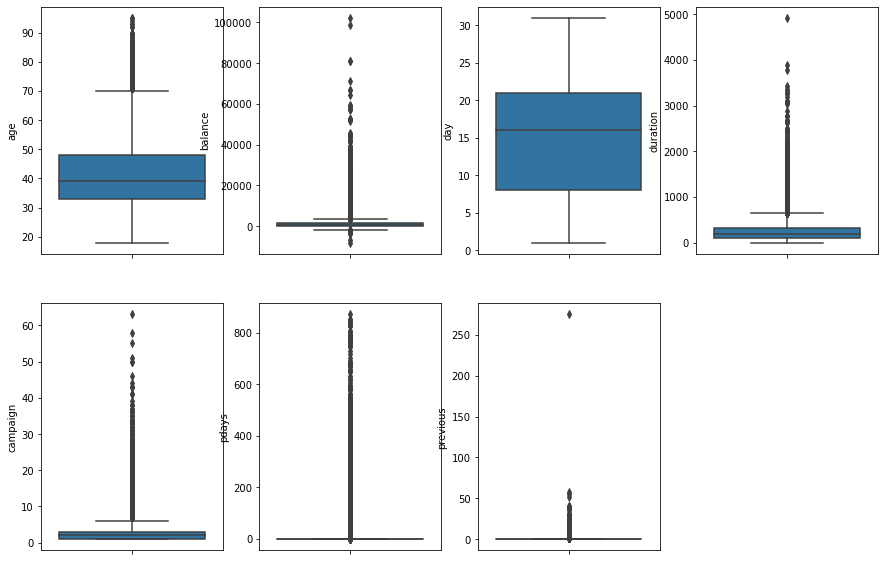

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank_data)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank_data)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank_data)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank_data)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank_data)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank_data)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank_data)
plt.show()

#### Normality test Fails and Outliers are present in our Data

#### Multicollinearity Check

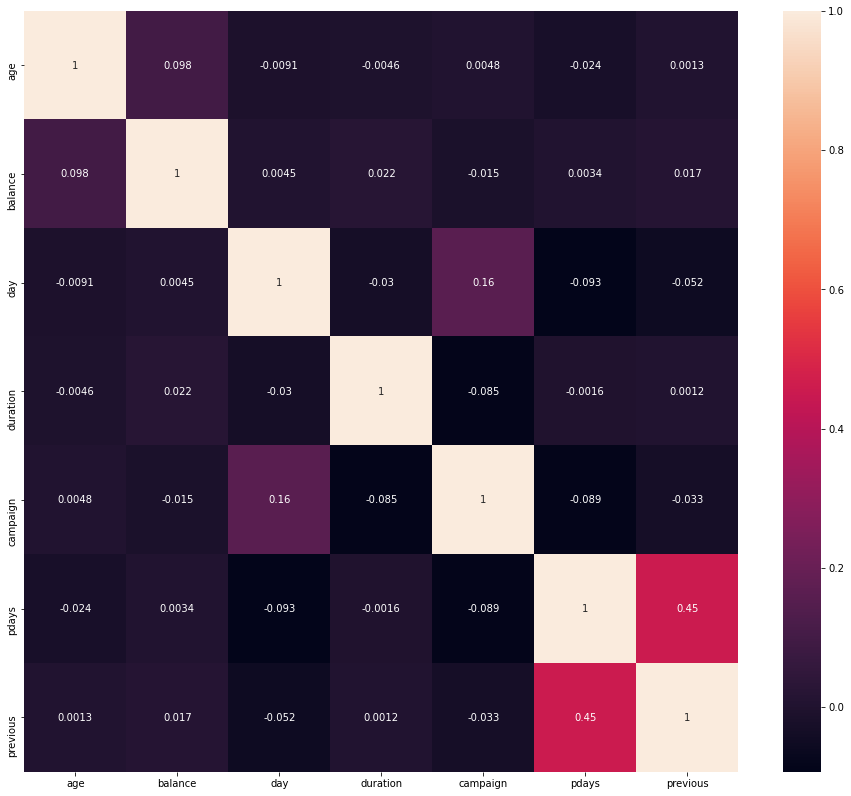

In [8]:
plt.figure(figsize=(16,14))
sns.heatmap(bank_data.corr(),annot=True)
plt.show()

#### There is no multicollinearity problem in our data

### Count of the Every Categorical Variable Present in the Data

In [9]:
categorical_feature= bank_data.select_dtypes(include='object')

for count in categorical_feature:
    print(count,'\n')
    print(bank_data[count].value_counts())
    print('-----------------------------\n')


job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-----------------------------

marital 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
-----------------------------

education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-----------------------------

default 

no     44396
yes      815
Name: default, dtype: int64
-----------------------------

housing 

yes    25130
no     20081
Name: housing, dtype: int64
-----------------------------

loan 

no     37967
yes     7244
Name: loan, dtype: int64
-----------------------------

contact 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
-----------------------------

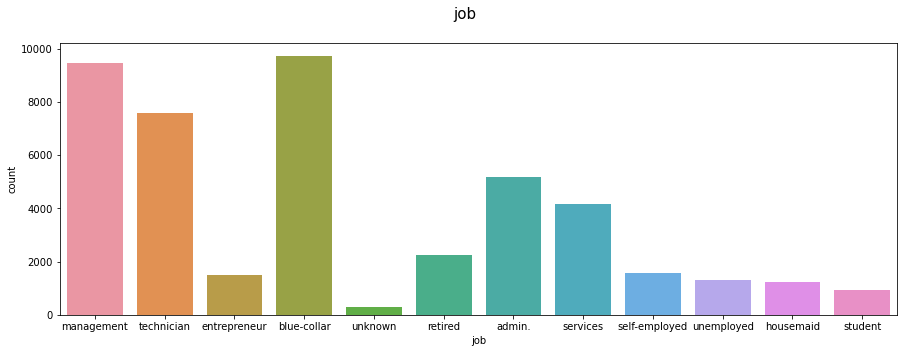


----------------------------------------------------------------------------------------------------------------


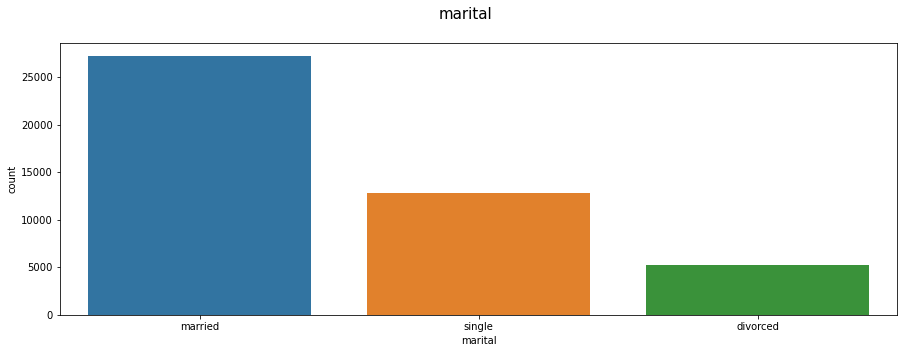


----------------------------------------------------------------------------------------------------------------


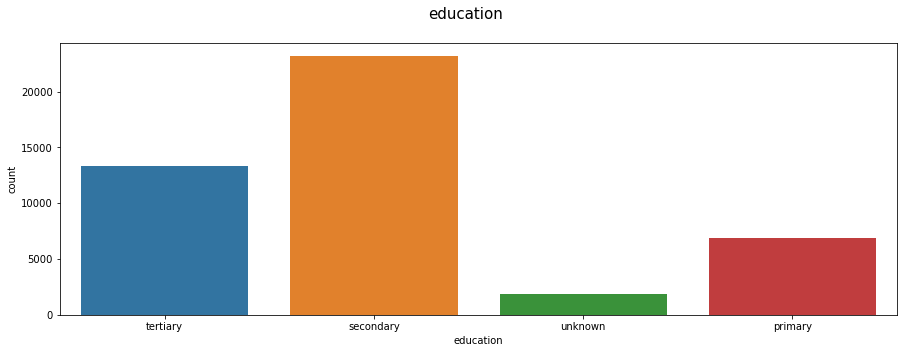


----------------------------------------------------------------------------------------------------------------


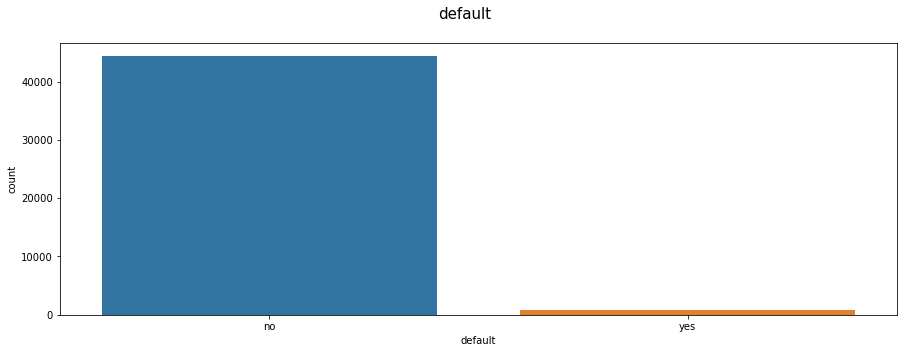


----------------------------------------------------------------------------------------------------------------


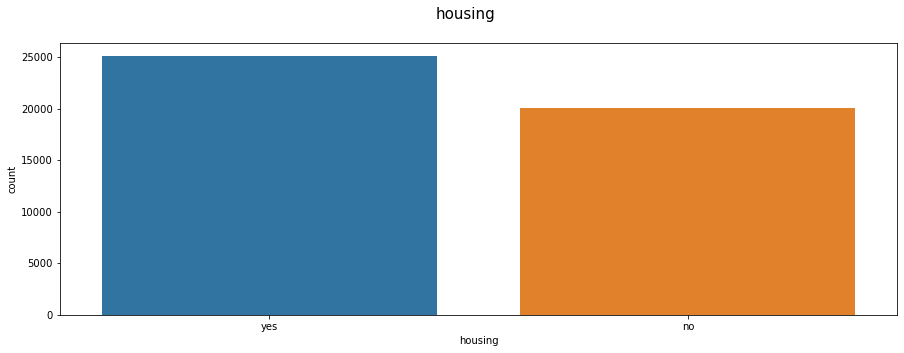


----------------------------------------------------------------------------------------------------------------


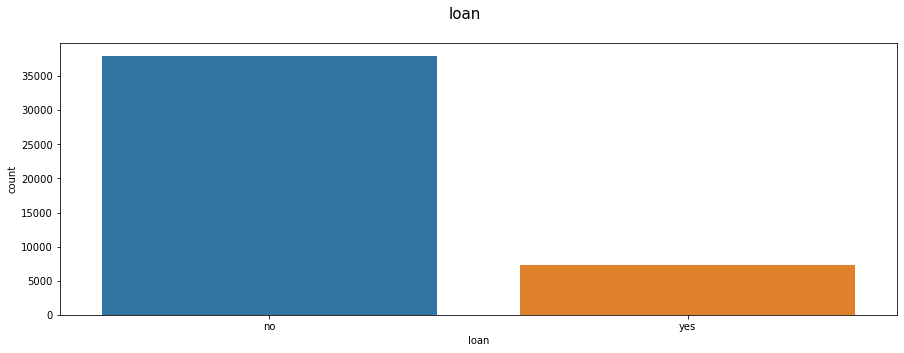


----------------------------------------------------------------------------------------------------------------


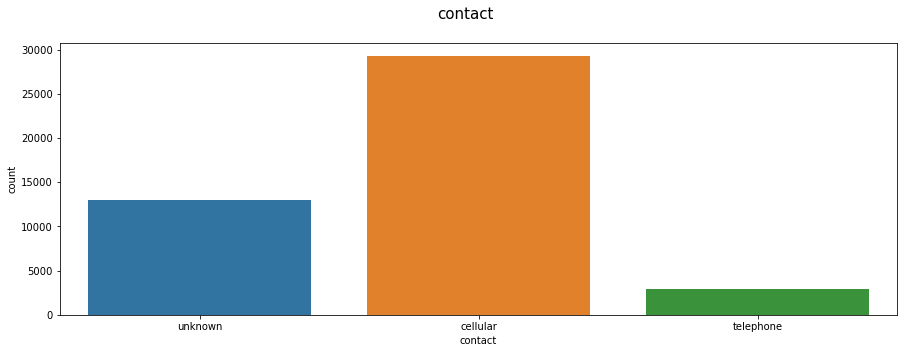


----------------------------------------------------------------------------------------------------------------


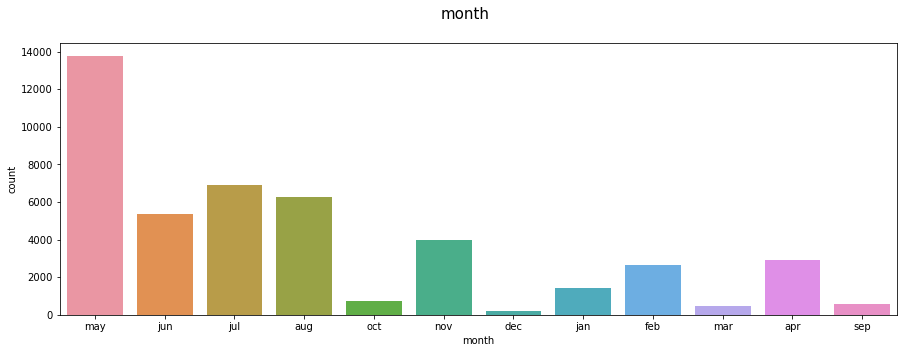


----------------------------------------------------------------------------------------------------------------


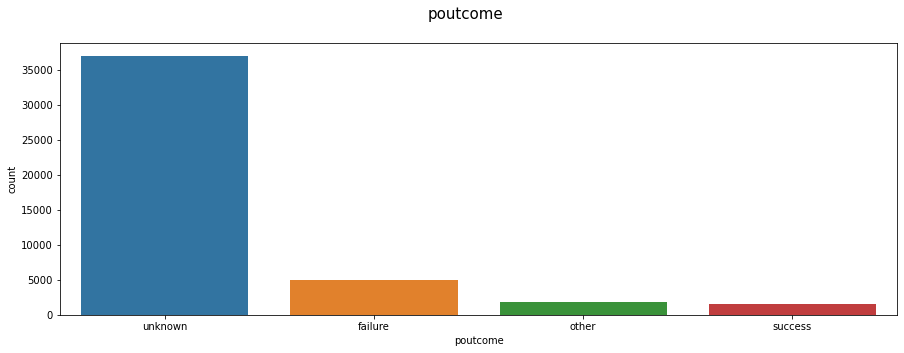


----------------------------------------------------------------------------------------------------------------


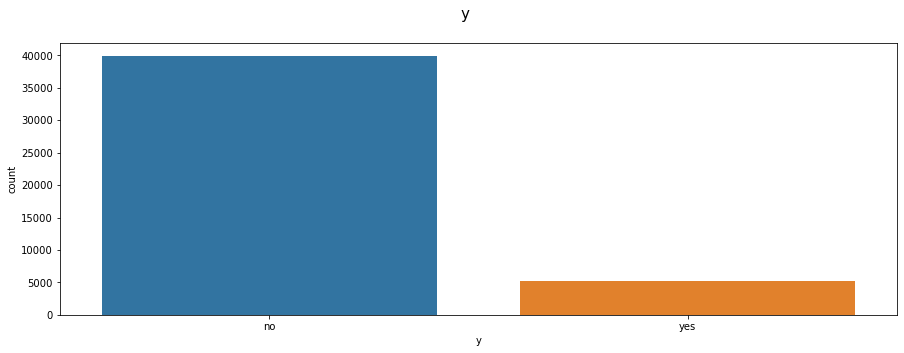


----------------------------------------------------------------------------------------------------------------


In [10]:
for plot in categorical_feature:
    plt.figure(figsize=(15,5))
    sns.countplot(x=bank_data[plot], data= bank_data)
    plt.suptitle(plot, size=15)
    plt.show()
    print('\n----------------------------------------------------------------------------------------------------------------')

## 4. Data Preprocessing

In [11]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank_data[col] = bank_data[col].apply(convert)

In [13]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [14]:
bank_data=pd.get_dummies(data=bank_data, drop_first=True)
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


## 5. Model Building

In [16]:
X=bank_data.drop('y', axis=1)
y=bank_data[['y']]

In [17]:
y.value_counts()

y
0    39922
1     5289
dtype: int64

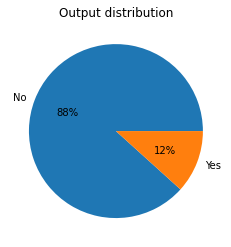

In [18]:
plt.pie(x=y.value_counts(), labels=['No','Yes'],autopct='%1.0f%%')
plt.title('Output distribution')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=10, shuffle=True,stratify=y)

In [21]:
X_train.shape, y_train.shape

((36168, 42), (36168, 1))

In [22]:
X_test.shape, y_test.shape

((9043, 42), (9043, 1))

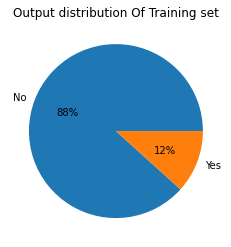

In [23]:
plt.pie(x=y_train.value_counts(), labels=['No','Yes'],autopct='%1.0f%%')
plt.title('Output distribution Of Training set')
plt.show()

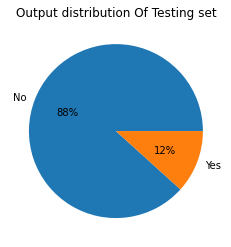

In [24]:
plt.pie(x=y_test.value_counts(), labels=['No','Yes'],autopct='%1.0f%%')
plt.title('Output distribution Of Testing set')
plt.show()

## 6. Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

## 7. Model Testing | 8. Model Evaluation

### Training DataSet

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
y_pred_train=logistic_model.predict(X_train)

In [28]:
print('Accuracy Score :', accuracy_score(y_train, y_pred_train))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_pred_train))
print('\nClassification report:\n', classification_report(y_train, y_pred_train))

Accuracy Score : 0.8878843176288431

Confusion Matrix:
 [[31425   512]
 [ 3543   688]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     31937
           1       0.57      0.16      0.25      4231

    accuracy                           0.89     36168
   macro avg       0.74      0.57      0.60     36168
weighted avg       0.86      0.89      0.86     36168



0.5732888750406873


Text(0, 0.5, 'True Positive Rate')

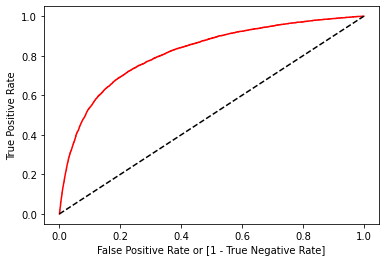

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing DataSet

In [30]:
y_pred_test=logistic_model.predict(X_test)

In [31]:
print('Accuracy Score :', accuracy_score(y_test, y_pred_test))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('\nClassification report:\n', classification_report(y_test, y_pred_test))

Accuracy Score : 0.8921817980758597

Confusion Matrix:
 [[7875  110]
 [ 865  193]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.64      0.18      0.28      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



0.5843219150273493


Text(0, 0.5, 'True Positive Rate')

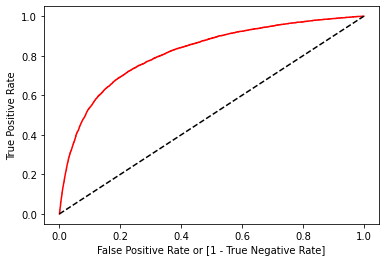

In [32]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### K fold Cross-validation

In [33]:
n_fold=KFold(n_splits=5, shuffle=True, random_state=10)

cv_scores=cross_val_score(estimator=logistic_model, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.89439345 0.89172749 0.89216987 0.89504534 0.88332227]
Mean Accuracy: 0.8913316878245189
Std Deviation: 0.004199418572932361


### In order to reduce False Negetives, we give more weights to the Data which is  Imbalanced

In [34]:
logistic_model=LogisticRegression(class_weight={0:1,1:6})
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 6})

## 7. Model Testing | 8. Model Evaluation

### Training DataSet

In [35]:
y_pred_train=logistic_model.predict(X_train)

In [36]:
print('Accuracy Score :', accuracy_score(y_train, y_pred_train))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_pred_train))
print('\nClassification report:\n', classification_report(y_train, y_pred_train))

Accuracy Score : 0.8380612696306127

Confusion Matrix:
 [[27164  4773]
 [ 1084  3147]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     31937
           1       0.40      0.74      0.52      4231

    accuracy                           0.84     36168
   macro avg       0.68      0.80      0.71     36168
weighted avg       0.90      0.84      0.86     36168



0.7971726561615


Text(0, 0.5, 'True Positive Rate')

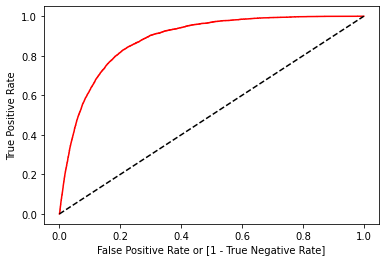

In [37]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing DataSet

In [38]:
y_pred_test=logistic_model.predict(X_test)

In [39]:
print('Accuracy Score :', accuracy_score(y_test, y_pred_test))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('\nClassification report:\n', classification_report(y_test, y_pred_test))

Accuracy Score : 0.8354528364480814

Confusion Matrix:
 [[6777 1208]
 [ 280  778]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      7985
           1       0.39      0.74      0.51      1058

    accuracy                           0.84      9043
   macro avg       0.68      0.79      0.71      9043
weighted avg       0.89      0.84      0.86      9043



0.7920330297947593


Text(0, 0.5, 'True Positive Rate')

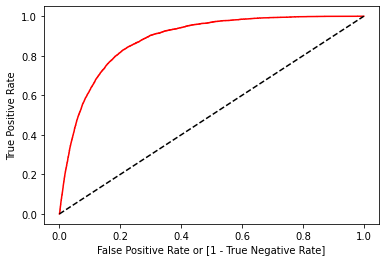

In [40]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## 9. Data Optimisation Using Standardsaclar

In [41]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [42]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()

X[['age','balance','day','duration','campaign','pdays','previous']] = std_scalar.fit_transform(X[['age','balance','day','duration','campaign','pdays','previous']])
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,0,-0.437895,1,0,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0,0.047205,1,0,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1


In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=10, shuffle=True,stratify=y)

In [44]:
X_train.shape, y_train.shape

((36168, 42), (36168, 1))

In [45]:
X_test.shape, y_test.shape

((9043, 42), (9043, 1))

## 6. Model Training

In [46]:
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 6})

## 7. Model Testing | 8. Model Evaluation

### Training DataSet

In [47]:
y_pred_train=logistic_model.predict(X_train)

In [48]:
print('Accuracy Score :', accuracy_score(y_train, y_pred_train))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_pred_train))
print('\nClassification report:\n', classification_report(y_train, y_pred_train))

Accuracy Score : 0.8622815748728158

Confusion Matrix:
 [[27853  4084]
 [  897  3334]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     31937
           1       0.45      0.79      0.57      4231

    accuracy                           0.86     36168
   macro avg       0.71      0.83      0.75     36168
weighted avg       0.91      0.86      0.88     36168



0.8300583124065447


Text(0, 0.5, 'True Positive Rate')

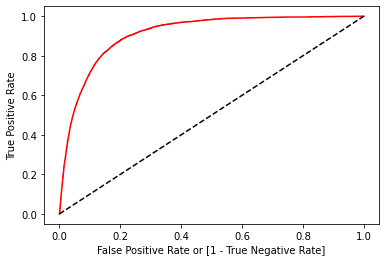

In [49]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing DataSet

In [50]:
y_pred_test=logistic_model.predict(X_test)

In [51]:
print('Accuracy Score :', accuracy_score(y_test, y_pred_test))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('\nClassification report:\n', classification_report(y_test, y_pred_test))

Accuracy Score : 0.8580117217737476

Confusion Matrix:
 [[6946 1039]
 [ 245  813]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      7985
           1       0.44      0.77      0.56      1058

    accuracy                           0.86      9043
   macro avg       0.70      0.82      0.74      9043
weighted avg       0.90      0.86      0.87      9043



0.8191560144079222


Text(0, 0.5, 'True Positive Rate')

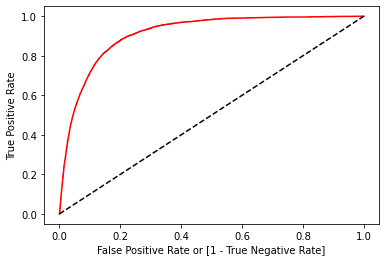

In [52]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')